In [ ]:
import os
import getpass

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
git_user = "shyamal-anadkat" # Enter user or organization name
git_email = "shyamalanadkat@gmail.com" # Enter your email
repo_name = "AIPI540_ComputerVision" # Enter repo name
git_token = "" # Enter your github token 
git_path = f"https://{git_token}@github.com/{git_user}/{repo_name}.git"
!git clone "{git_path}"

%cd AIPI540_ComputerVision
!pip install -r requirements.txt
%cd scripts
%ls

torch:  1.10 ; cuda:  cu111


Copying files: 1249 files [00:00, 1681.54 files/s]


torch.Size([4, 3, 244, 244])


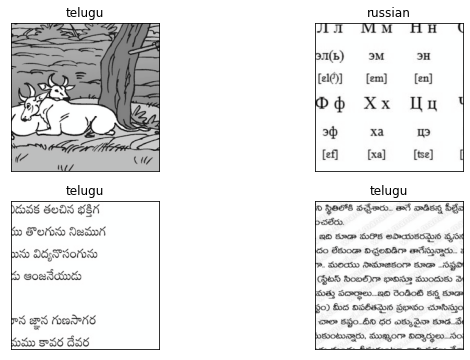

All done!


In [2]:
%run make_dataset.py